# Spaceship Titanic Dataset

### Importing the libraries that will be used in the project and the dataset, file "train.csv".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno 
import seaborn as sns
import numpy as np
import csv
from wordcloud import WordCloud

# Using train data from https://www.kaggle.com/competitions/spaceship-titanic/
file_path = 'train.csv'
base = pd.read_csv(file_path)
base.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Data Summary

In [2]:
summary = base.describe()
# Remove trailing zeros from the float values in the summary
summary_formatted = summary.to_string(float_format=lambda x: '{:.0f}'.format(x) if x.is_integer() else '{:.2f}'.format(x))
print(summary_formatted)

        Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
count  8514         8512       8510          8485    8510    8505
mean  28.83       224.69     458.08        173.73  311.14  304.85
std   14.49       666.72    1611.49        604.70 1136.71 1145.72
min       0            0          0             0       0       0
25%      19            0          0             0       0       0
50%      27            0          0             0       0       0
75%      38           47         76            27      59      46
max      79        14327      29813         23492   22408   24133


### Check for Missing data

In [3]:
#list missing values in the dataframe
missing_values = base.isnull()
total_missing_values = base.isnull().sum().sum()
print("Missing values in entire DataFrame:")
print(total_missing_values)

Missing values in entire DataFrame:
2324


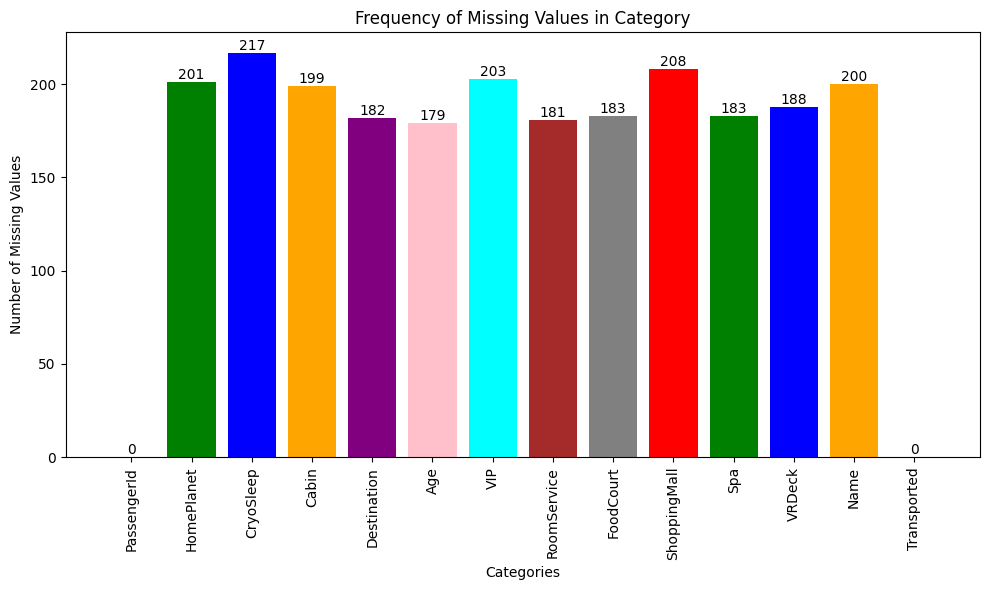

In [4]:
## Dictionary to store column names as keys and corresponding missing values count as values
missing_values_dict = {}

# Iterate through each column and find missing values
for column in base.columns:
    missing_values_count = base[column].isnull().sum()
    missing_values_dict[column] = missing_values_count

# Create lists for column names and missing values counts
columns = list(missing_values_dict.keys())
missing_counts = list(missing_values_dict.values())

# Define distinctive colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'cyan', 'brown', 'gray']

# Create a bar chart with distinctive colors and frequency labels on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(columns, missing_counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Number of Missing Values')
plt.title('Frequency of Missing Values in Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()



#### All Transported values are present. 

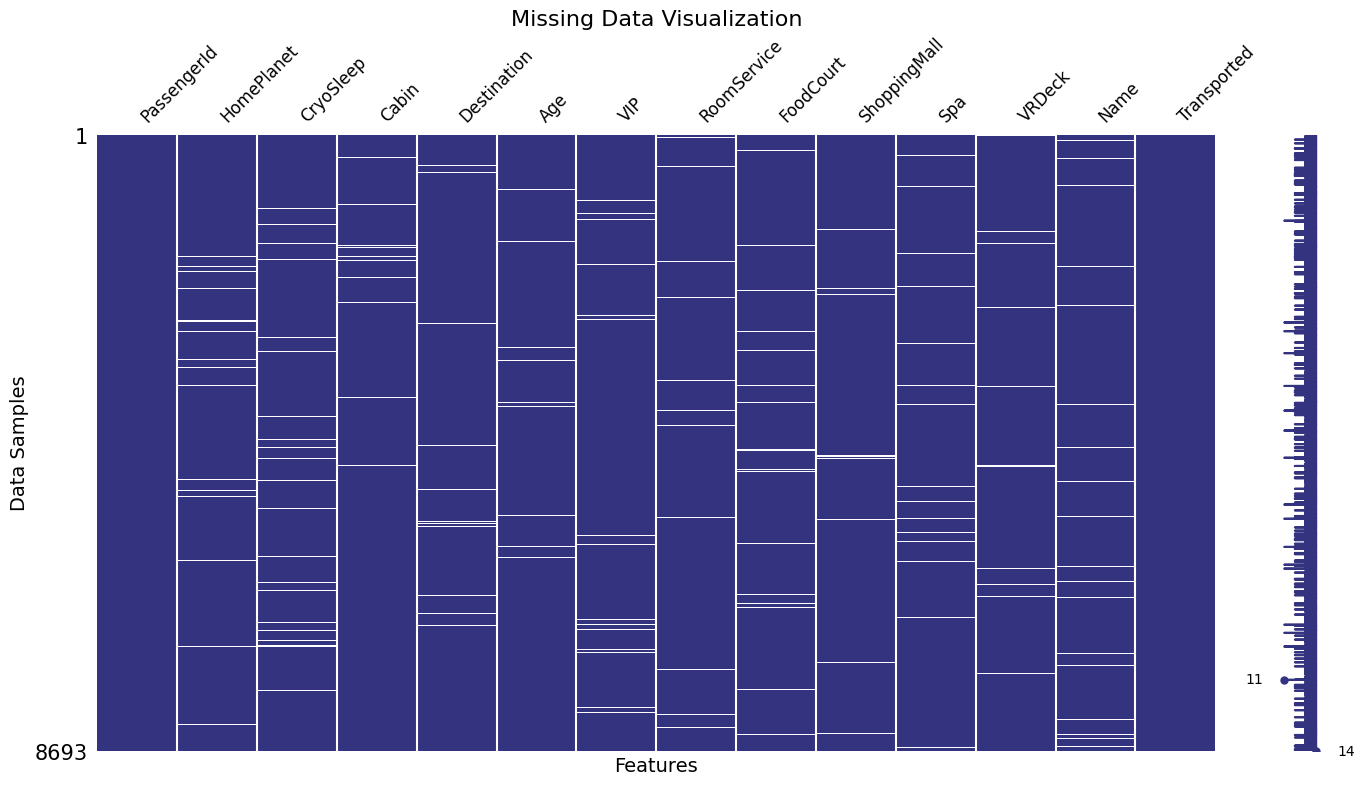

In [5]:
# Alternativelly, using missigno to visualize missing data
missingno.matrix(base,figsize=(16,8), fontsize=12, color=(0.20, 0.20, 0.50)) 

# Customize plot labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Data Samples', fontsize=14)
plt.title('Missing Data Visualization', fontsize=16)


plt.show()

### Make the Transported 0 or 1 before splitting the dataframe

In [6]:
# Check unique values in the 'Transported' column
#print(df['Transported'].unique())
base.loc[:, 'Transported'] = base['Transported'].astype(int)
#print(df['Transported'].unique())
#df.Transported.value_counts()

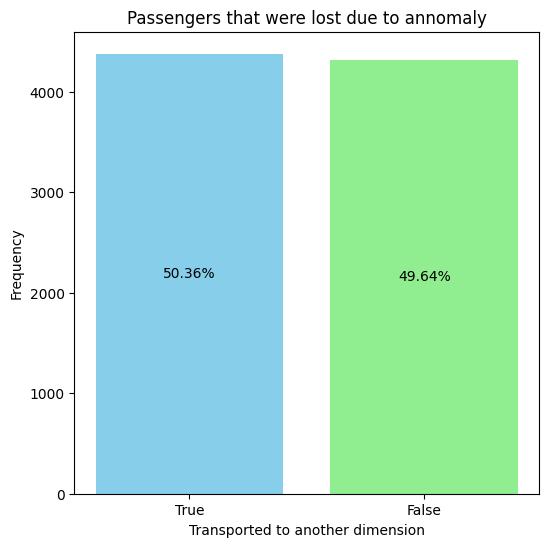

In [7]:
# Count the frequency of True and False values in the 'Transported' column
transported_counts = base['Transported'].value_counts()

# Data for the bar chart
categories = ['True', 'False']
counts = [transported_counts.get(1, 0), transported_counts.get(0, 0)]

# Calculate percentages
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Define colors for each bar
colors = ['skyblue', 'lightgreen']

# Plotting the bar chart with colored bars and percentages annotated in the middle
plt.figure(figsize=(6, 6))
bars = plt.bar(categories, counts, color=colors)

# Annotate the bars with percentages in the middle
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{percentage:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Transported to another dimension')
plt.ylabel('Frequency')
plt.title('Passengers that were lost due to annomaly')
plt.show()

### Separating the training data from the test

In [8]:
from sklearn.model_selection import train_test_split
X = base.drop(columns=['Transported'])
y = base.Transported
df, X_val, y_df, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
df.shape, y_df.shape

((6085, 13), (6085,))

In [10]:
y_val.shape, y_val.shape

((2608,), (2608,))

#### 70% Training data left on df

### Passenger's HomePlanet

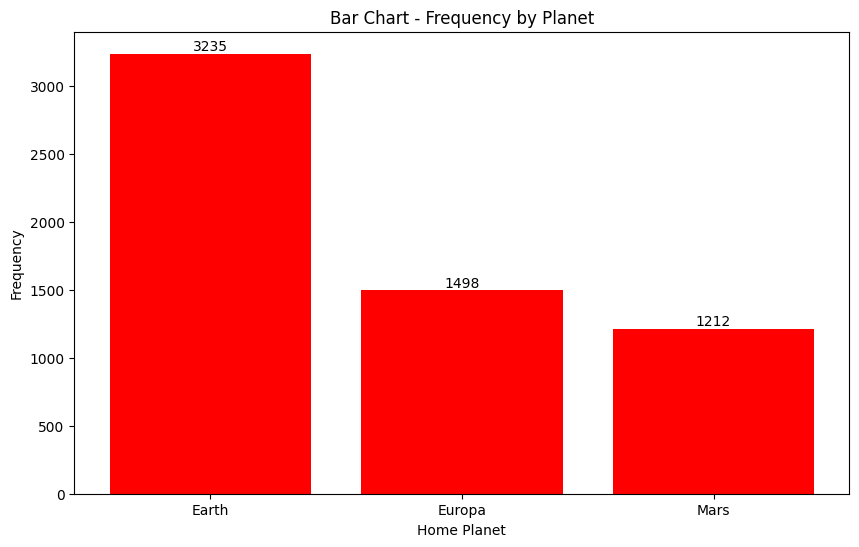

In [11]:
# Calculate the frequency of each value in the "HomePlanet" column
frequencies = df['HomePlanet'].value_counts()

# Sort the values of "HomePlanet" in ascending order
sorted_values = frequencies.sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_values.index, sorted_values.values, color='red')

# Add frequency values as text labels on the bars
for bar, frequency in zip(bars, sorted_values.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(frequency), ha='center', va='bottom')

# Configure labels and title of the chart
plt.xlabel('Home Planet')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by Planet')

# Display the chart
plt.show()


### Destination of Passengers

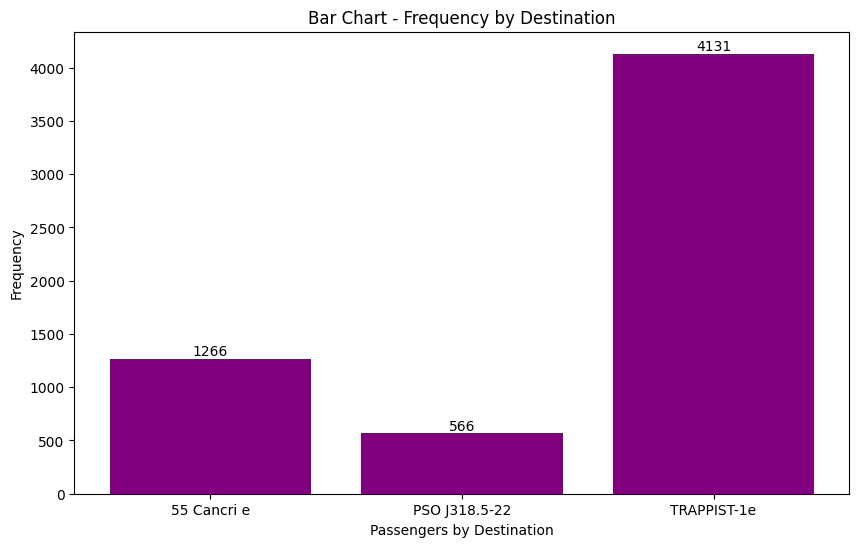

In [12]:
# Calculate the frequency of each value in the "Destination" column
frequencies = df['Destination'].value_counts()

# Sort the values of "Destination" in ascending order
sorted_values = frequencies.sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_values.index, sorted_values.values, color='purple')

# Add frequency values as text labels on the bars
for bar, frequency in zip(bars, sorted_values.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(frequency), ha='center', va='bottom')

# Configure the labels and title of the chart
plt.xlabel('Passengers by Destination')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by Destination')

# Display the chart
plt.show()


### Comparativo de passageiros em suspensao criogenica e acordados

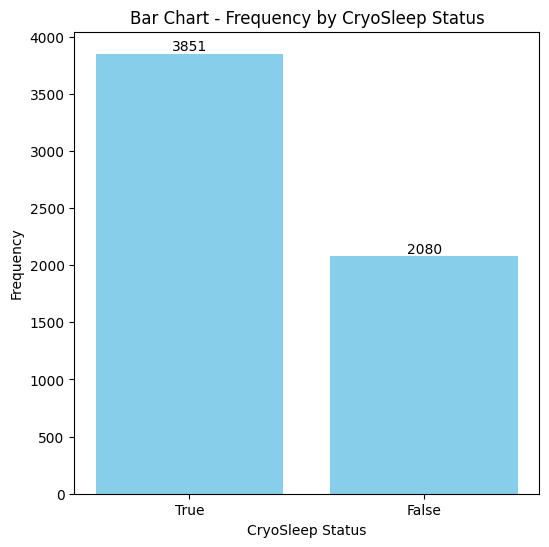

In [13]:
# Calculate the frequency of True and False values in the "CryoSleep" column
frequencies = df['CryoSleep'].value_counts()

# Create the bar chart with boolean values on the x-axis
plt.figure(figsize=(6, 6))
bars = plt.bar(['True', 'False'], frequencies.values, color='skyblue')

# Add frequency values as text labels on the bars
for bar, frequency in zip(bars, frequencies.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(frequency), ha='center', va='bottom')

# Configure the labels and title of the chart
plt.xlabel('CryoSleep Status')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by CryoSleep Status')

# Display the chart
plt.show()


### Distribuicao de idade dos passageiros

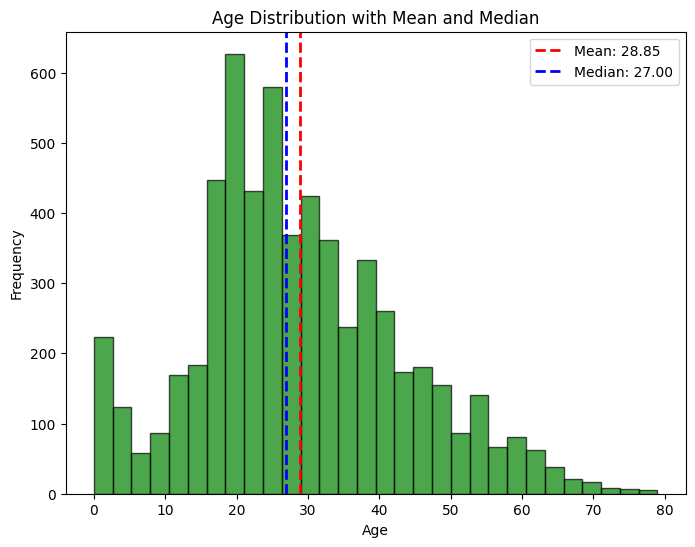

In [14]:
# Specify the column with age data
age_column = 'Age'

# Create a histogram for age data
plt.figure(figsize=(8, 6))
plt.hist(df[age_column], bins=30, color='green', edgecolor='black', alpha=0.7)

# Highlight mean and median on the plot
mean_age = df[age_column].mean()
median_age = df[age_column].median()

plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')

# Annotate mean and median values on the plot
#plt.text(mean_age, 50, f'{mean_age:.2f}', color='red', ha='center')
#plt.text(median_age, 45, f'{median_age:.2f}', color='green', ha='center')

# Configure labels and title of the chart
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Mean and Median')

# Show legend
plt.legend()

# Display the plot
plt.show()



### Pasenger's on VIP Class and broken commoners

In [15]:
# Count how many VIP values are True
count_vip_true = df['VIP'].sum()

print("Number of VIP values that are True:", count_vip_true)


Number of VIP values that are True: 139


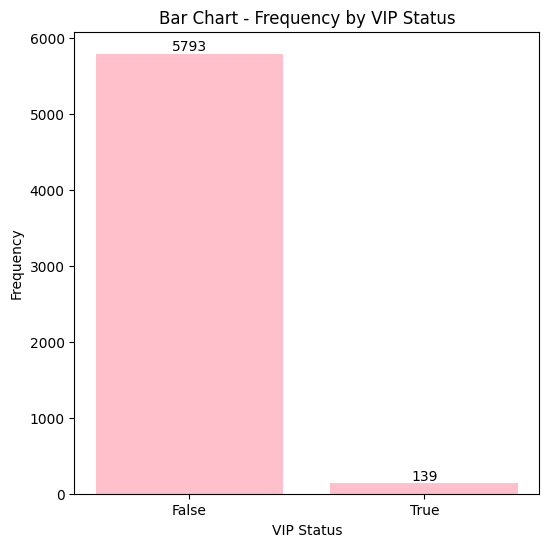

In [16]:
# Calculate the frequency of True and False values in the "VIP" column
frequencies = df['VIP'].value_counts()

# Create the bar chart with boolean values on the x-axis
plt.figure(figsize=(6, 6))
bars = plt.bar(['False', 'True'], frequencies.values, color='pink')

# Add frequency values as text labels on the bars
for bar, frequency in zip(bars, frequencies.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(frequency), ha='center', va='bottom')

# Configure the labels and title of the chart
plt.xlabel('VIP Status')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by VIP Status')

# Display the chart
plt.show()


### Distribution of Billed Amounts for Specific Amenities

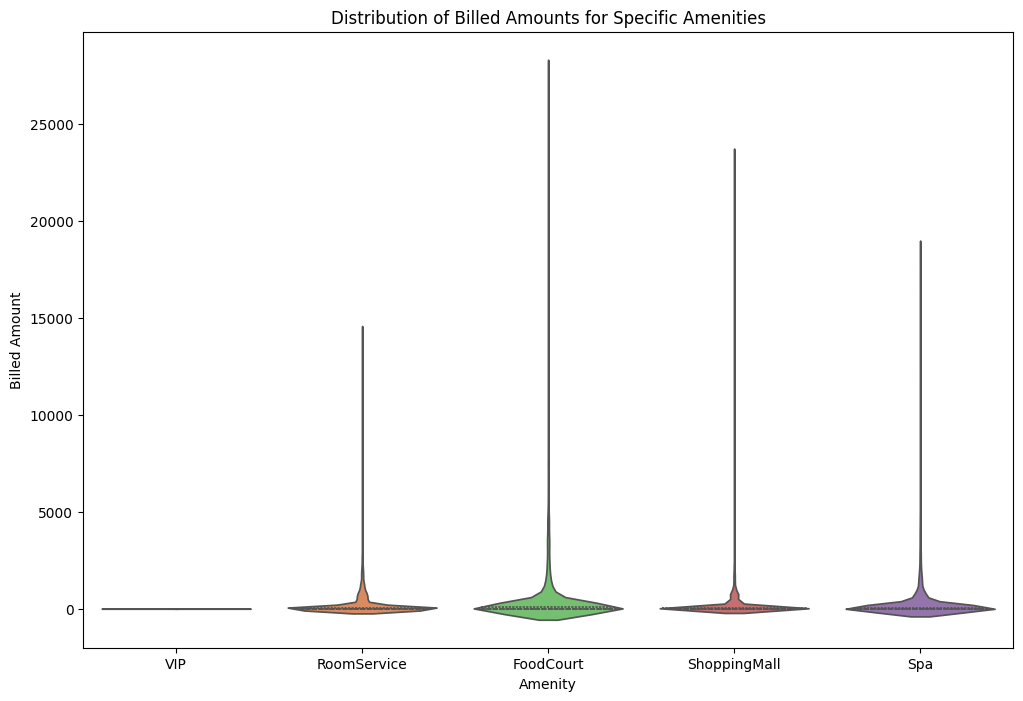

In [17]:
# Specify the indices of the columns you want to include in the plot
column_indices = [6, 7, 8, 9, 10]

# Create a subset of the DataFrame with the specified columns
subset_df = df.iloc[:, column_indices]

# Melt the DataFrame to long format for visualization
melted_df = subset_df.melt(var_name='Amenity', value_name='Billed Amount')

# Violin plot for the specified columns
plt.figure(figsize=(12, 8))
#sns.violinplot(x='Amenity', y='Billed Amount', data=melted_df, inner='quart', palette='muted')
sns.violinplot(x='Amenity', y='Billed Amount', data=melted_df, inner='quart', hue='Amenity', palette='muted', legend=False)
# Configure labels and title of the chart
plt.xlabel('Amenity')
plt.ylabel('Billed Amount')
plt.title('Distribution of Billed Amounts for Specific Amenities')

plt.show()


### Understanding expenses

In [18]:
# Creates a new dataframe to compare passengers expenses

# drop NaN values
df_cleaned = df.dropna(subset=['CryoSleep'])

# Convert to 1 and 0, instead of True and False boolean
df_cleaned.loc[:, 'CryoSleep'] = df_cleaned['CryoSleep'].astype(int)

# Filter passengers in cryogenic sleep (where CryoSleep column is 1)
cryosleep_passengers = df_cleaned[df_cleaned['CryoSleep'] == 1]

# Filter passengers not in cryogenic sleep (where CryoSleep column is 0)
non_cryosleep_passengers = df_cleaned[df_cleaned['CryoSleep'] == 0]


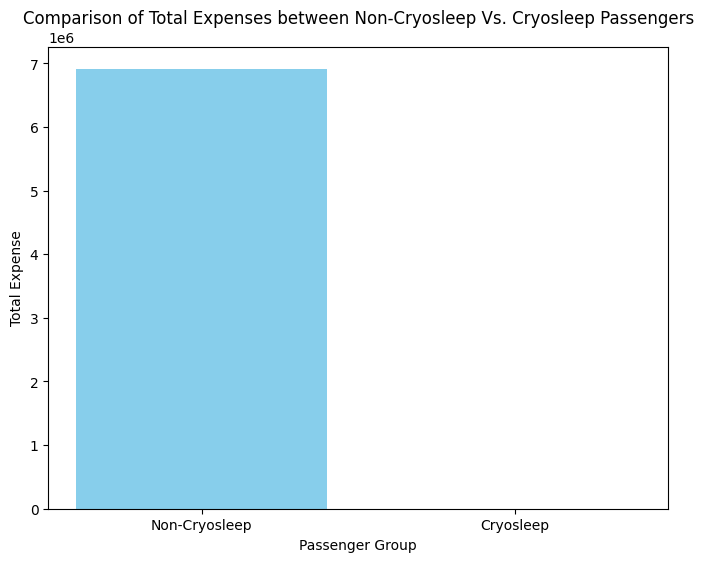

In [19]:
import matplotlib.pyplot as plt

# Calculate total expenses for non-cryosleep passengers
non_cryosleep_total_expense = non_cryosleep_passengers[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Calculate total expenses for cryosleep passengers
cryosleep_total_expense = cryosleep_passengers[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Create a bar chart to compare total expenses between non-cryosleep and cryosleep passengers
plt.figure(figsize=(8, 6))
plt.bar(['Non-Cryosleep', 'Cryosleep'], [non_cryosleep_total_expense.sum(), cryosleep_total_expense.sum()], color=['skyblue', 'orange'])
plt.xlabel('Passenger Group')
plt.ylabel('Total Expense')
plt.title('Comparison of Total Expenses between Non-Cryosleep Vs. Cryosleep Passengers')
plt.show()



#### Observation: No cryosleep passengers had expenses in any of the amenities

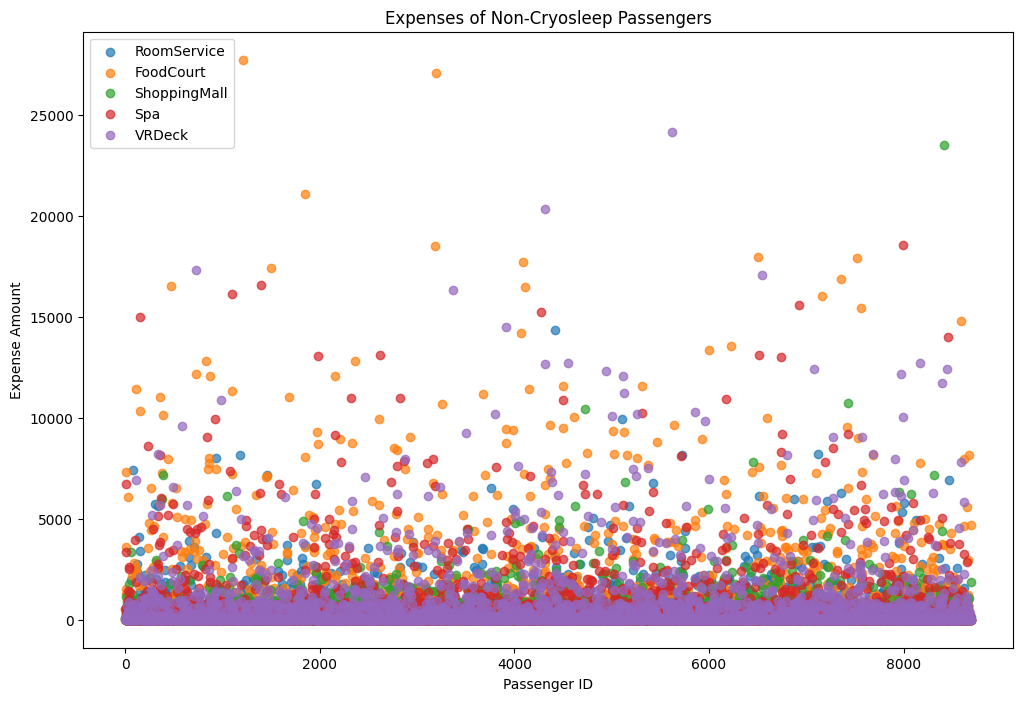

In [20]:
# Categories of expenses
expense_categories = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
AMENITIES = expense_categories
# Create scatter plots for each expense category for non_cryosleep passengers
plt.figure(figsize=(12, 8))
for category in expense_categories:
    plt.scatter(non_cryosleep_passengers.index, non_cryosleep_passengers[category], label=category, alpha=0.7)

plt.xlabel('Passenger ID')
plt.ylabel('Expense Amount')
plt.title('Expenses of Non-Cryosleep Passengers')
plt.legend()
plt.show()

#### This was a mostly useless plot, let's try ploting expenses against age

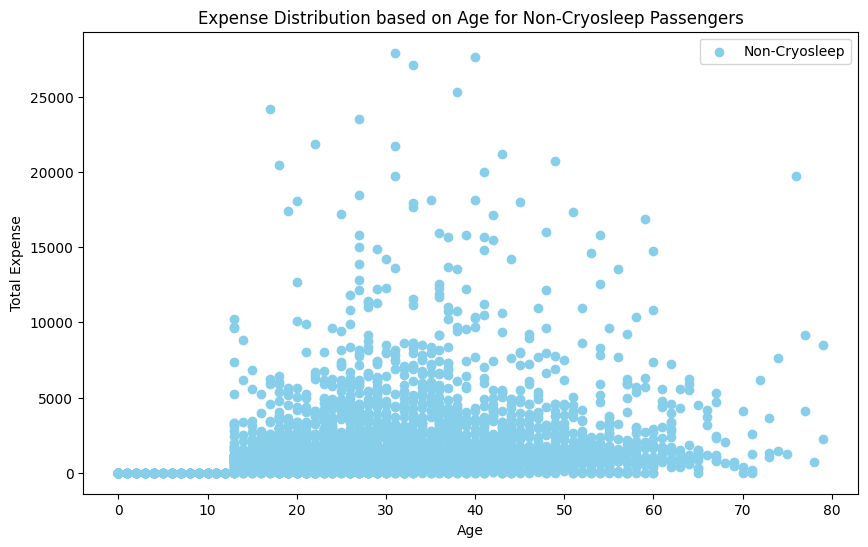

In [21]:
# Calculate total expenses for non-cryosleep passengers based on age
pd.options.mode.chained_assignment = None
non_cryosleep_passengers.loc[:, 'TotalExpense'] = non_cryosleep_passengers[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Create a scatter plot to show the expense distribution based on age for non-cryosleep passengers only
plt.figure(figsize=(10, 6))
plt.scatter(non_cryosleep_passengers['Age'], non_cryosleep_passengers['TotalExpense'], color='skyblue', label='Non-Cryosleep')

plt.xlabel('Age')
plt.ylabel('Total Expense')
plt.title('Expense Distribution based on Age for Non-Cryosleep Passengers')
plt.legend()
plt.show()



#### Passengers under 13 years old didn't have any expense. That makes sense as it might be under their parents key card.

In [22]:
# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under CryoSleep in the specified columns
missing_values_count = df.loc[df.CryoSleep == 1, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under CryoSleep:")
print(missing_values_count)

# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under 13 years old in the specified columns
missing_values_count = df.loc[df.Age < 13, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under 13 years old:")
print(missing_values_count)

Number of missing values for passengers under CryoSleep:
RoomService     41
FoodCourt       48
ShoppingMall    70
Spa             38
VRDeck          46
VIP             51
dtype: int64
Number of missing values for passengers under 13 years old:
RoomService     14
FoodCourt        8
ShoppingMall    14
Spa             10
VRDeck          12
VIP             19
dtype: int64


In [23]:
# Replaces missing values with 0 for passengers under 13 years old
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
values = dict(zip(SERVICES, [0.0]*5))
values['VIP'] = False
df.loc[df.Age < 13] = df.loc[df.Age < 13].fillna(value=values)

In [24]:
# Replaces missing values with 0 for passengers under CryoSleep
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
values = dict(zip(SERVICES, [0.0]*5))
values['VIP'] = False
df.loc[df.CryoSleep == 1] = df.loc[df.CryoSleep == 1].fillna(value=values)

In [25]:
# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under CryoSleep in the specified columns
missing_values_count = df.loc[df.CryoSleep == 1, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under CryoSleep:")
print(missing_values_count)

# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under 13 years old in the specified columns
missing_values_count = df.loc[df.Age < 13, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under 13 years old:")
print(missing_values_count)

Number of missing values for passengers under CryoSleep:
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
VIP             0
dtype: int64
Number of missing values for passengers under 13 years old:
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
VIP             0
dtype: int64


### Useless study about possible kinship using surname as reference (nothing to see here, move on)

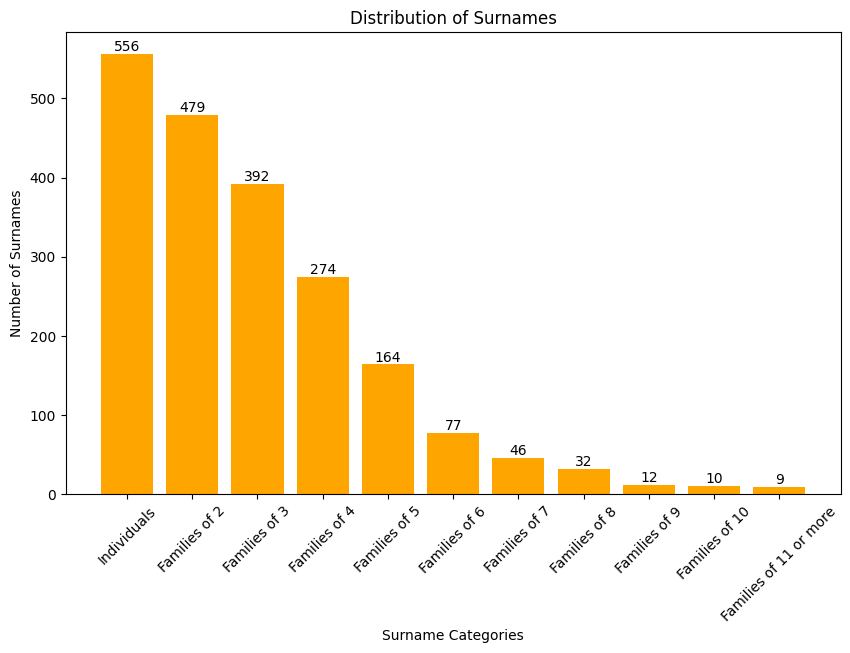

In [26]:
# Convert NaN values to an empty string before splitting
df_surname = df.copy()
# Convert NaN values to an empty string before splitting
df_surname['Name'] = df_surname['Name'].fillna('')

# Extract Surnames
df_surname['Surname'] = df_surname['Name'].apply(lambda x: x.split()[-1] if x else '')

surname_counts = df_surname['Surname'].value_counts()

# Count families (surnames with multiple occurrences)
individuals = len(surname_counts[surname_counts == 1])
families_2 = len(surname_counts[surname_counts == 2])
families_3 = len(surname_counts[surname_counts == 3])
families_4 = len(surname_counts[surname_counts == 4])
families_5 = len(surname_counts[surname_counts == 5])
families_6 = len(surname_counts[surname_counts == 6])
families_7 = len(surname_counts[surname_counts == 7])
families_8 = len(surname_counts[surname_counts == 8])
families_9 = len(surname_counts[surname_counts == 9])
families_10 = len(surname_counts[surname_counts == 10])
families_11_or_more = len(surname_counts[surname_counts >= 11])

# Data for the bar chart
categories = ['Individuals', 'Families of 2', 'Families of 3', 'Families of 4', 'Families of 5',
              'Families of 6', 'Families of 7', 'Families of 8', 'Families of 9', 'Families of 10', 'Families of 11 or more']
counts = [individuals, families_2, families_3, families_4, families_5, families_6, families_7, families_8, families_9,
          families_10, families_11_or_more]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='orange')
plt.xlabel('Surname Categories')
plt.ylabel('Number of Surnames')
plt.title('Distribution of Surnames')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adding frequency values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()




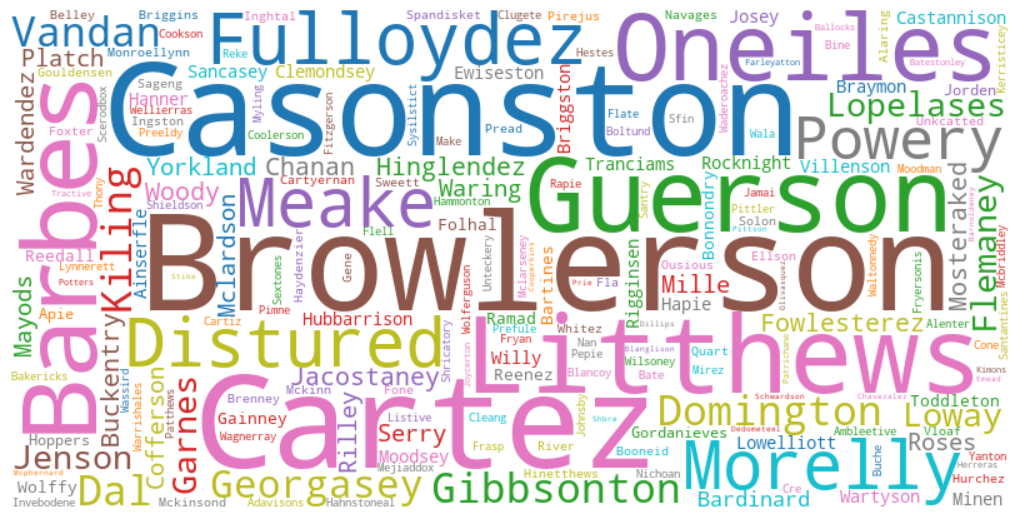

In [27]:
# Assuming surname_counts contains the surname frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(surname_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Adding surnames where indivudual is under the same family Id

In [28]:
# Iterate through the DataFrame
for index, row in df_surname.iterrows():
    passenger_id = row['PassengerId']
    surname = row['Surname']
    
    # Check if the surname is missing and PassengerId is not empty
    if len(str(surname)) < 2 and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]
        
        # Find related PassengerId with a valid surname
        related_passenger_id = df_surname.loc[(df_surname['PassengerId'].str.contains(family_number)) & 
                                               (df_surname['Surname'].str.len() >= 2), 'PassengerId'].values
        
        # If there is a related PassengerId, fill the missing surname
        if len(related_passenger_id) > 0:
            related_surname = df_surname.loc[df_surname['PassengerId'] == related_passenger_id[0], 'Surname'].values[0]
            df_surname.at[index, 'Surname'] = related_surname

# Now df_surname should have missing surnames filled based on related PassengerIds

# Fill missing 'Name' values with 'Noname' + 'Surname' for rows where 'Surname' is not empty and 'Name' is missing
df_surname['Name'] = df_surname.apply(lambda row: 'Noname ' + row['Surname'] if len(str(row['Name'])) < 2 and row['Surname'] else row['Name'], axis=1)
import numpy as np

# Quick fix of Name category NaN values
df_surname['Name'] = df_surname.apply(lambda row: np.nan if len(str(row['Name'])) < 2 and not row['Surname'] else row['Name'], axis=1)

# Count missing data under the 'Name' category
missing_name_count = df_surname['Name'].isna().sum()

print("Number of missing values under 'Name' category:", missing_name_count)


Number of missing values under 'Name' category: 78


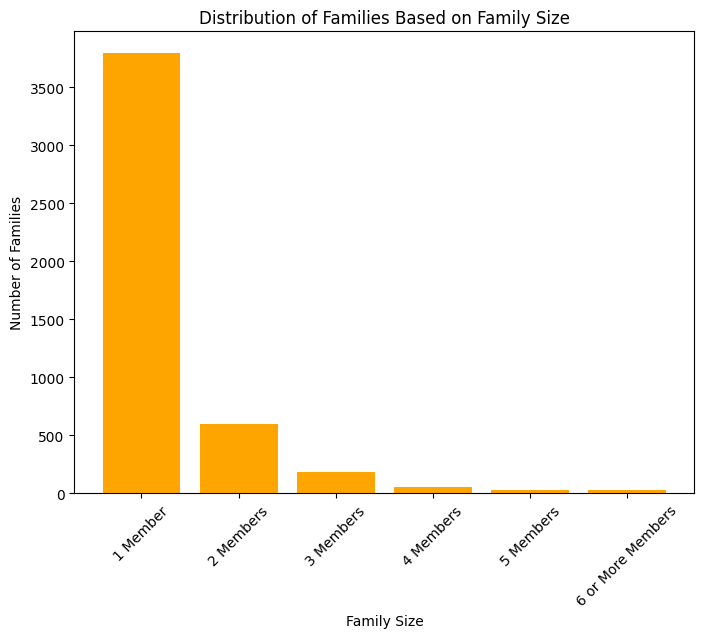

In [29]:
# Extract family and individual numbers
df['FamilyNumber'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
df['IndividualNumber'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

# Count occurrences for each family number (XXXX)
family_counts = df['FamilyNumber'].value_counts()

# Count occurrences for each family number (XXXX)
family_counts = df['FamilyNumber'].value_counts()

# Count occurrences for each individual number (YY) within the same family
individual_counts = df.groupby('FamilyNumber')['IndividualNumber'].nunique()

# Count families with 1, 2, 3, 4, 5, or 6 or more members
families_1_member = len(individual_counts[individual_counts == 1])
families_2_members = len(individual_counts[individual_counts == 2])
families_3_members = len(individual_counts[individual_counts == 3])
families_4_members = len(individual_counts[individual_counts == 4])
families_5_members = len(individual_counts[individual_counts == 5])
families_6_or_more_members = len(individual_counts[individual_counts >= 6])

# Data for the bar chart
categories = ['1 Member', '2 Members', '3 Members', '4 Members', '5 Members', '6 or More Members']
counts = [families_1_member, families_2_members, families_3_members, families_4_members, families_5_members, families_6_or_more_members]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='orange')
plt.xticks(rotation=45)
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.title('Distribution of Families Based on Family Size')
plt.show()



In [30]:
# Iterate through the DataFrame
for index, row in df_surname.iterrows():
    passenger_id = row['PassengerId']
    destination = row['Destination']
    
    # Check if the destination is missing (NaN) and PassengerId is not empty
    if pd.isna(destination) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]
        
        # Find related PassengerId with a valid destination
        related_passenger_id = df_surname.loc[(df_surname['PassengerId'].str.contains(family_number)) & 
                                               (~df_surname['Destination'].isna()), 'PassengerId'].values
        
        # If there is a related PassengerId, fill the missing destination
        if len(related_passenger_id) > 0:
            related_destination = df_surname.loc[df_surname['PassengerId'] == related_passenger_id[0], 'Destination'].values[0]
            df_surname.at[index, 'Destination'] = related_destination

# Now df_surname should have missing destinations filled based on related PassengerIds


In [31]:
# Iterate through the DataFrame
for index, row in df_surname.iterrows():
    passenger_id = row['PassengerId']
    cabin = row['Cabin']
    
    # Check if the cabin is missing (NaN) and PassengerId is not empty
    if pd.isna(cabin) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]
        
        # Find related PassengerId with a valid cabin
        related_passenger_id = df_surname.loc[(df_surname['PassengerId'].str.contains(family_number)) & 
                                               (~df_surname['Cabin'].isna()), 'PassengerId'].values
        
        # If there is a related PassengerId, fill the missing cabin
        if len(related_passenger_id) > 0:
            related_cabin = df_surname.loc[df_surname['PassengerId'] == related_passenger_id[0], 'Cabin'].values[0]
            df_surname.at[index, 'Cabin'] = related_cabin

# Now df_surname should have missing cabins filled based on related PassengerIds


In [32]:
# Iterate through the DataFrame
for index, row in df_surname.iterrows():
    passenger_id = row['PassengerId']
    cryo_sleep = row['CryoSleep']
    
    # Check if CryoSleep is missing (NaN) and PassengerId is not empty
    if pd.isna(cryo_sleep) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]
        
        # Find related CryoSleep values for individuals with the same family number
        related_cryo_sleep_values = df_surname.loc[df_surname['PassengerId'].str.contains(family_number), 'CryoSleep'].dropna()
        
        # If there are related CryoSleep values, fill the missing CryoSleep based on majority
        if not related_cryo_sleep_values.empty:
            # Count True and False values
            true_count = related_cryo_sleep_values.sum()
            false_count = len(related_cryo_sleep_values) - true_count
            
            # Fill missing CryoSleep based on majority
            if true_count > false_count:
                df_surname.at[index, 'CryoSleep'] = True
            elif false_count > true_count:
                df_surname.at[index, 'CryoSleep'] = False

# Now df_surname should have missing CryoSleep values filled based on majority of related individuals


In [33]:
# Iterate through the DataFrame
for index, row in df_surname.iterrows():
    passenger_id = row['PassengerId']
    home_planet = row['HomePlanet']
    
    # Check if HomePlanet is missing (NaN) and PassengerId is not empty
    if pd.isna(home_planet) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]
        
        # Find related HomePlanet values for individuals with the same family number
        related_home_planet_values = df_surname.loc[df_surname['PassengerId'].str.contains(family_number), 'HomePlanet'].dropna()
        
        # If there are related HomePlanet values, fill the missing HomePlanet based on majority
        if not related_home_planet_values.empty:
            # Count unique values and their counts
            value_counts = related_home_planet_values.value_counts()
            
            # Get the most common value
            most_common_value = value_counts.index[0]
            
            # Fill missing HomePlanet with the most common value
            df_surname.at[index, 'HomePlanet'] = most_common_value

# Now df_surname should have missing HomePlanet values filled based on majority of related individuals


### Trying to clean up Age data

In [34]:
# Count missing values in the 'Age' column
missing_age_count = df_surname['Age'].isna().sum()

# Print the count of missing values in the 'Age' column
print("Number of Missing Values in Age Column:", missing_age_count)


Number of Missing Values in Age Column: 129


In [35]:
# Iterate through the DataFrame
for index, row in df_surname.iterrows():
    passenger_id = row['PassengerId']
    age = row['Age']
    
    # Check if Age is missing (NaN) and PassengerId is not empty
    if pd.isna(age) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]
        
        # Find related Age values for individuals with the same family number
        related_age_values = df_surname.loc[df_surname['PassengerId'].str.contains(family_number), 'Age'].dropna()
        
        # Check if there are individuals with less than 18 years old in the family
        if (related_age_values < 18).any():
            # Get mean age of adults (over 18) in the family
            mean_adult_age = related_age_values[related_age_values >= 18].mean()
            
            # Find missing Age values under the same family number
            missing_age_indices = df_surname.loc[df_surname['PassengerId'].str.contains(family_number) & df_surname['Age'].isna()].index
            
            # Fill up to two missing Age values with the mean adult age
            for i, missing_age_index in enumerate(missing_age_indices):
                if i >= 2:
                    break
                df_surname.at[missing_age_index, 'Age'] = mean_adult_age

# Now df_surname should have missing Age values filled based on family mean for adults (up to two members)


In [36]:
# Create a mask for rows with missing Age values
missing_age_mask = df_surname['Age'].isna()

# Extract family numbers from PassengerId
df_surname['FamilyNumber'] = df_surname['PassengerId'].str.split('_').str[0].str[:4]

# Find groups with 3 or more members and at least one missing Age value
groups_with_missing_age = (
    df_surname.groupby('FamilyNumber')
    .filter(lambda x: len(x) >= 3 and missing_age_mask.loc[x.index].any())
)

# Calculate the mean age of individuals below 19 years old and round it to an integer
mean_age_below_19 = round(df_surname.loc[df_surname['Age'] < 19, 'Age'].mean())

# Replace missing Age values in groups with 3 or more members and at least one missing Age value
for index, row in df_surname.loc[groups_with_missing_age.index].iterrows():
    family_number = row['FamilyNumber']
    destination = row['Destination']
    if destination is not None and destination != '' and df_surname[(df_surname['FamilyNumber'] == family_number) 
                                                                    & (df_surname['Destination'] == destination) 
                                                                    & ~missing_age_mask].shape[0] > 0:
        df_surname.at[index, 'Age'] = mean_age_below_19
print("Mean Age of Individuals below 19 (Rounded to Integer):", mean_age_below_19)



Mean Age of Individuals below 19 (Rounded to Integer): 11


In [37]:
# Create a mask for rows with Age values equal to 0
missing_age_mask = (df_surname['Age'] == 0)

# Extract family numbers from PassengerId
df_surname['FamilyNumber'] = df_surname['PassengerId'].str.split('_').str[0].str[:4]

# Filter groups with 3 or more members and at least one Age value equal to 0
groups_with_missing_age = (
    df_surname.groupby('FamilyNumber')
    .filter(lambda x: len(x) >= 3 and missing_age_mask.loc[x.index].any())
)

# Print the groups with 3 or more members and at least one Age value equal to 0
print(groups_with_missing_age['FamilyNumber'].unique())


['6020' '3966' '8157' '6334' '1800' '3301' '1186' '1434' '9227' '3100'
 '4181' '8318' '4695' '4482' '1918' '6402' '5967' '5969' '3211' '6662'
 '5714' '2595' '2919' '5090' '6787' '8796' '2892' '1325' '6030' '4400'
 '2602' '1353' '4061' '5535' '3499' '1149' '9074' '2944' '6328' '4128'
 '1624' '0714' '8186' '2549' '0313' '2347' '2818' '6816' '2558' '8202'
 '3868' '6139' '8964' '7650' '5416' '8770' '0220' '3476' '2560' '1615'
 '0809' '6405' '0938' '3032' '1024' '4000' '6446']


In [38]:
# Create a mask for rows with Age values equal to 1
missing_age_mask = (df_surname['Age'] == 1)

# Extract family numbers from PassengerId
df_surname['FamilyNumber'] = df_surname['PassengerId'].str.split('_').str[0].str[:4]

# Filter groups with 3 or more members and at least one Age value equal to 1
groups_with_missing_age = (
    df_surname.groupby('FamilyNumber')
    .filter(lambda x: len(x) >= 3 and missing_age_mask.loc[x.index].any())
)

# Print the groups with 3 or more members and at least one Age value equal to 1
print(groups_with_missing_age['FamilyNumber'].unique())


['1800' '3301' '1186' '3903' '3100' '6363' '2306' '9081' '1865' '4061'
 '8226' '3499' '4592' '7872' '0714' '6309' '8886' '6092' '0020' '1311'
 '0220' '1287' '6443' '3218' '7899' '6446' '8366' '5527']


In [39]:
# Count missing values in the 'Age' column
missing_age_count = df_surname['Age'].isna().sum()

# Print the count of missing values in the 'Age' column
print("Number of Missing Values in Age Column:", missing_age_count)


Number of Missing Values in Age Column: 106


In [40]:
# Find individuals with Age=0 and do not have another individual with the same value in FamilyNumber
age_zero_no_family_match = df_surname[(df_surname['Age'] == 0) & 
                                       ~df_surname.duplicated(subset='FamilyNumber', keep=False)]

# Replace Age=0 with NaN for individuals with no other family member with the same Age
df_surname.loc[age_zero_no_family_match.index, 'Age'] = df_surname.loc[age_zero_no_family_match.index, 'Age'].replace(0, float('nan'))

# Verify the changes
print("Missing values (NaN) were replaced for individuals with Age=0 and no other family member with the same Age.")


Missing values (NaN) were replaced for individuals with Age=0 and no other family member with the same Age.


In [41]:
# Find individuals with Age=1 and do not have another individual with the same value in FamilyNumber
age_one_no_family_match = df_surname[(df_surname['Age'] == 1) & 
                                       ~df_surname.duplicated(subset='FamilyNumber', keep=False)]

# Replace Age=1 with NaN for individuals with no other family member with the same Age
df_surname.loc[age_one_no_family_match.index, 'Age'] = df_surname.loc[age_one_no_family_match.index, 'Age'].replace(1, float('nan'))

# Verify the changes
print("Missing values (NaN) were replaced for individuals with Age=1 and no other family member with the same Age.")

Missing values (NaN) were replaced for individuals with Age=1 and no other family member with the same Age.


In [42]:
# Fill missing Age values with the mean adult age
df_surname['Age'] = df_surname['Age'].fillna(mean_adult_age)

# Count missing values in the 'Age' column after filling
missing_age_count_after_fill = df_surname['Age'].isna().sum()

# Print the count of missing values in the 'Age' column after filling
print("Mean adult age:", mean_adult_age)


Mean adult age: 42.0


#### Dealing with the other missing data using averages and mode

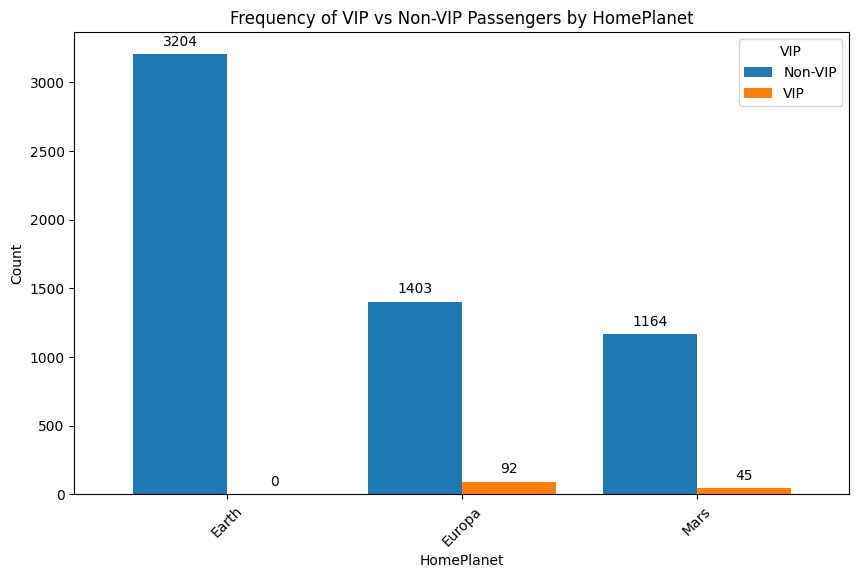

In [43]:
# Group the data by HomePlanet and VIP, then count the occurrences
planet_vip_counts = df_surname.groupby(['HomePlanet', 'VIP']).size().unstack(fill_value=0)

# Plot the data with separate bars for VIP and Non-VIP
ax = planet_vip_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Frequency of VIP vs Non-VIP Passengers by HomePlanet')
plt.legend(title='VIP', labels=['Non-VIP', 'VIP'])
plt.xticks(rotation=45)

# Annotate the bars with frequency numbers
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


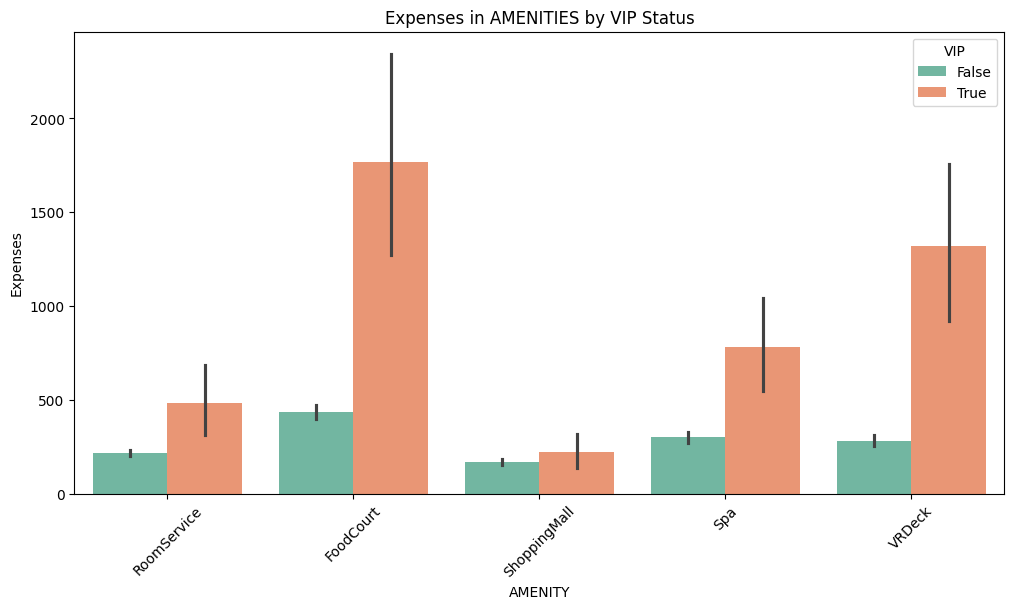

In [44]:
# Reshape the DataFrame using melt to create a long-format DataFrame
melted_df = df_surname.melt(id_vars='VIP', value_vars=AMENITIES, var_name='AMENITY', value_name='Expenses')

# Create a barplot to visualize expenses in AMENITIES based on VIP status
plt.figure(figsize=(12, 6))
sns.barplot(x='AMENITY', y='Expenses', hue='VIP', data=melted_df, palette='Set2')
plt.xlabel('AMENITY')
plt.ylabel('Expenses')
plt.title('Expenses in AMENITIES by VIP Status')
plt.xticks(rotation=45)
plt.legend(title='VIP', loc='upper right')
plt.show()



In [45]:
print("Number of Missing Values in VIP Column before Filling:", df_surname['VIP'].isna().sum())

Number of Missing Values in VIP Column before Filling: 90


In [46]:
# Calculate the probability of VIP status for each HomePlanet category
vip_prob_by_homeplanet = df_surname.groupby('HomePlanet')['VIP'].mean()

print("Probability of VIP status by HomePlanet:")
print(vip_prob_by_homeplanet*100)


Probability of VIP status by HomePlanet:
HomePlanet
Earth          0.0
Europa    6.153846
Mars      3.722084
Name: VIP, dtype: object


In [47]:
# Fill missing VIP values where HomePlanet is Earth as False
# Even without this step it would end up with only one VIP
earth_vip_mask = (df_surname['HomePlanet'] == 'Earth') & (df_surname['VIP'].isna())
df_surname.loc[earth_vip_mask, 'VIP'] = False
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())

Number of Missing Values in VIP Column after Filling: 36


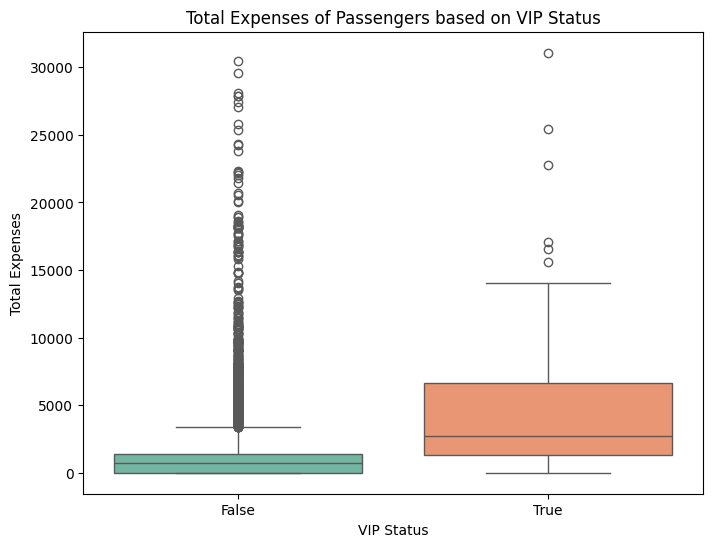

In [48]:
# Calculate total expenses for each passenger
df_surname['TotalExpenses'] = df_surname[AMENITIES].sum(axis=1)

# Create a boxplot for total expenses based on VIP status
plt.figure(figsize=(8, 6))
sns.boxplot(x='VIP', y='TotalExpenses', hue='VIP', data=df_surname, palette='Set2', legend=False)
plt.xlabel('VIP Status')
plt.ylabel('Total Expenses')
plt.title('Total Expenses of Passengers based on VIP Status')
plt.show()



In [49]:
# Calculate the 50th percentile expense of VIP=True passengers across all amenities
percentile_50_expense_vip_true = df_surname[df_surname['VIP'] == True][AMENITIES].sum(axis=1).quantile(0.5)

# Find PassengerIDs with missing VIP values and expenses higher than the 50th percentile of VIP=True passengers
passenger_ids_to_fill = []
for passenger_id, row in df_surname.iterrows():
    if pd.isna(row['VIP']) and row[AMENITIES].sum() > percentile_50_expense_vip_true:
        passenger_ids_to_fill.append(passenger_id)

# Print PassengerIDs that meet the specified condition
#print("PassengerIDs with missing VIP values and expenses higher than 50th percentile of VIP=True passengers:")
#print(passenger_ids_to_fill)



# Set missing data of selected PassengerIDs to VIP=True
df_surname.loc[passenger_ids_to_fill, 'VIP'] = True

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())

Number of Missing Values in VIP Column after Filling: 24


In [50]:
# Create a mask for rows with missing VIP values
missing_vip_mask = df_surname['VIP'].isna()

# Count non-missing VIP values for each family
non_missing_vip_count = df_surname.groupby('FamilyNumber')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df_surname.groupby('FamilyNumber')['VIP'].transform('max')

# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value
rows_to_fill_vip = missing_vip_mask & families_with_one_missing_vip

# Fill missing VIP values based on other individuals with the same FamilyNumber
df_surname.loc[rows_to_fill_vip, 'VIP'] = df_surname.groupby('FamilyNumber')['VIP'].transform('first')

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 20


In [51]:
# Create a mask for rows with missing VIP values
missing_vip_mask = df_surname['VIP'].isna()

# Count non-missing VIP values for each Cabin
non_missing_vip_count = df_surname.groupby('Cabin')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df_surname.groupby('Cabin')['VIP'].transform('max')

# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value
candidates_to_fill_vip = df_surname.loc[missing_vip_mask & families_with_one_missing_vip, ['PassengerId', 'Cabin']]

# Fill missing VIP values based on other individuals with the same Cabin
for index, row in candidates_to_fill_vip.iterrows():
    passenger_id = row['PassengerId']
    cabin = row['Cabin']
    related_vip_value = df_surname.loc[df_surname['Cabin'] == cabin, 'VIP'].dropna().iloc[0]
    df_surname.loc[df_surname['PassengerId'] == passenger_id, 'VIP'] = related_vip_value

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 19


In [52]:
# Create a mask for rows with missing VIP values
missing_vip_mask = df_surname['VIP'].isna()

# Count non-missing VIP values for each Cabin
non_missing_vip_count = df_surname.groupby('Cabin')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df_surname.groupby('Cabin')['VIP'].transform('max')

# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value
candidates_to_fill_vip = df_surname.loc[missing_vip_mask & families_with_one_missing_vip, ['PassengerId', 'Cabin']]

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 19


In [53]:
# Create a mask for rows with missing VIP values
missing_vip_mask = df_surname['VIP'].isna()

# Count non-missing VIP values for each Destination
non_missing_vip_count = df_surname.groupby('Destination')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df_surname.groupby('Destination')['VIP'].transform('max')

# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value
candidates_to_fill_vip = df_surname.loc[missing_vip_mask & families_with_one_missing_vip, ['PassengerId', 'Destination']]

# Fill missing VIP values based on other individuals with the same Destination
for index, row in candidates_to_fill_vip.iterrows():
    passenger_id = row['PassengerId']
    destination = row['Destination']
    related_vip_value = df_surname.loc[df_surname['Destination'] == destination, 'VIP'].dropna().iloc[0]
    df_surname.loc[df_surname['PassengerId'] == passenger_id, 'VIP'] = related_vip_value

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 19


In [54]:
# Fill missing VIP values based on HomePlanet-specific probabilities
for planet, prob in vip_prob_by_homeplanet.items():
    missing_mask = (df_surname['HomePlanet'] == planet) & df_surname['VIP'].isna()
    fill_values = np.random.choice([True, False], size=missing_mask.sum(), p=[prob, 1 - prob])
    df_surname.loc[missing_mask, 'VIP'] = fill_values

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 3


In [55]:
# Calculate the mode of the VIP column
vip_mode = df_surname['VIP'].mode().iloc[0]

# Calculate the total number of passengers
total_passengers = len(df_surname)

# Calculate the number of passengers with VIP as True
vip_passengers = df_surname['VIP'].sum()

# Calculate the probability of a random PassengerId having VIP as True
probability_vip = vip_passengers / total_passengers

print("Mode of VIP column:", vip_mode)
print("Probability of a random PassengerId having VIP as True:", probability_vip)



Mode of VIP column: False
Probability of a random PassengerId having VIP as True: 0.024815119145439605


In [56]:
# Filling missing data with mode for those that have missing data for HomePlanet
print("Number of VIP passengers before updating VIP column:", df_surname['VIP'].sum())
print("Number of Missing Values in VIP Column before Filling:", df_surname['VIP'].isna().sum())
# Calculate the total number of passengers with the same Surname
total_passengers_by_surname = df_surname.groupby('Surname')['PassengerId'].count()

# Fill missing values in 'VIP' column with Mode
df_surname['VIP'] = df_surname['VIP'].fillna(vip_mode)

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df_surname['VIP'].isna().sum())

Number of VIP passengers before updating VIP column: 151
Number of Missing Values in VIP Column before Filling: 3
Number of Missing Values in VIP Column after Filling: 0


In [57]:
df_surname['VIP'] = df_surname['VIP'].astype(int)

### Fixing CryoSleep missing data with some sourcery

In [58]:
# Create a mask for rows with missing CryoSleep values
missing_cryosleep_mask = df_surname['CryoSleep'].isna()

# Count non-missing CryoSleep values for each family
non_missing_cryosleep_count = df_surname.groupby('FamilyNumber')['CryoSleep'].transform('count')

# Find families where all individuals except one have a non-missing CryoSleep value
families_with_one_missing_cryosleep = (non_missing_cryosleep_count - 1) == df_surname.groupby('FamilyNumber')['CryoSleep'].transform('max')

# Filter rows with missing CryoSleep values and families where all individuals except one have a non-missing CryoSleep value
rows_to_fill_cryosleep = missing_cryosleep_mask & families_with_one_missing_cryosleep

# Fill missing CryoSleep values based on other individuals with the same FamilyNumber
df_surname.loc[rows_to_fill_cryosleep, 'CryoSleep'] = df_surname.groupby('FamilyNumber')['CryoSleep'].transform('first')

# Verify changes
print("Number of Missing Values in CryoSleep Column before Filling:", missing_cryosleep_mask.sum())
print("Number of Missing Values in CryoSleep Column after Filling:", df_surname['CryoSleep'].isna().sum())



Number of Missing Values in CryoSleep Column before Filling: 93
Number of Missing Values in CryoSleep Column after Filling: 83


In [59]:
# Create a mask for rows with missing CryoSleep values
missing_cryosleep_mask = df_surname['CryoSleep'].isna()

# Count non-missing CryoSleep values for each Cabin
non_missing_cryosleep_count = df_surname.groupby('Cabin')['CryoSleep'].transform('count')

# Find Cabins where all individuals except one have a non-missing CryoSleep value
cabins_with_one_missing_cryosleep = (non_missing_cryosleep_count - 1) == df_surname.groupby('Cabin')['CryoSleep'].transform('max')

# Filter rows with missing CryoSleep values and Cabins where all individuals except one have a non-missing CryoSleep value
rows_to_fill_cryosleep = missing_cryosleep_mask & cabins_with_one_missing_cryosleep

# Fill missing CryoSleep values based on other individuals with the same Cabin
df_surname.loc[rows_to_fill_cryosleep, 'CryoSleep'] = df_surname.groupby('Cabin')['CryoSleep'].transform('first')

# Verify changes
print("Number of Missing Values in CryoSleep Column before Filling:", missing_cryosleep_mask.sum())
print("Number of Missing Values in CryoSleep Column after Filling:", df_surname['CryoSleep'].isna().sum())


Number of Missing Values in CryoSleep Column before Filling: 83
Number of Missing Values in CryoSleep Column after Filling: 83


In [60]:
# Check if the sum of specified columns is zero
AMENITIES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
if df_surname[AMENITIES].sum(axis=1).eq(0).any():
    # Fill missing CryoSleep values with True where the sum of specified columns is zero
    df_surname.loc[df_surname[AMENITIES].sum(axis=1).eq(0) & df_surname['CryoSleep'].isna(), 'CryoSleep'] = True
print("Number of Missing Values in CryoSleep Column after Filling:", df_surname['CryoSleep'].isna().sum())


Number of Missing Values in CryoSleep Column after Filling: 54


In [61]:
# Calculate the mode of the CryoSleep column
cryo_mode = df_surname['CryoSleep'].mode().iloc[0]

# Calculate the number of passengers with CryoSleep as True
cryo_true_passengers = df_surname['CryoSleep'].sum()

# Calculate the probability of a random PassengerId having CryoSleep as True
probability_cryosleep = cryo_true_passengers / total_passengers

print("Mode of CryoSleep column:", cryo_mode)
print("Probability of a random PassengerId having CryoSleep as True:", probability_cryosleep)


Mode of CryoSleep column: False
Probability of a random PassengerId having CryoSleep as True: 0.35168447000821695


In [62]:
# Filling randomly the missing data 
# Create a mask for missing CryoSleep values
missing_cryosleep_mask = df_surname['CryoSleep'].isna()

# Count the number of missing CryoSleep values
missing_cryosleep_count = missing_cryosleep_mask.sum()

# Calculate the number of True values based on the probability
num_true_values = int(probability_cryosleep * missing_cryosleep_count)

# Generate random True/False values based on the calculated probability
random_cryosleep_values = np.concatenate([np.ones(num_true_values), np.zeros(missing_cryosleep_count - num_true_values)])
np.random.shuffle(random_cryosleep_values)

# Fill missing CryoSleep values with the randomly generated values
df_surname.loc[missing_cryosleep_mask, 'CryoSleep'] = random_cryosleep_values

# Verify changes
print("Number of Missing Values in CryoSleep Column before Filling:", missing_cryosleep_count)
print("Number of Missing Values in CryoSleep Column after Filling:", df_surname['CryoSleep'].isna().sum())


Number of Missing Values in CryoSleep Column before Filling: 54
Number of Missing Values in CryoSleep Column after Filling: 0


In [63]:
df_surname['CryoSleep'] = df_surname['CryoSleep'].astype(int)

### Expenses inputation using means

In [64]:

# List of columns in AMENITIES
AMENITIES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Verify changes
print("Number of Missing Values in Each AMENITIES Column before Filling:")
print(df_surname[AMENITIES].isna().sum())

# Calculate the mean and median for each column in AMENITIES
mean_services = df_surname[AMENITIES].mean()
median_services = df_surname[AMENITIES].median()

# Print the results
print("Mean of AMENITIES columns:")
print(mean_services)

print("\nMedian of AMENITIES columns:")
print(median_services)


Number of Missing Values in Each AMENITIES Column before Filling:
RoomService     70
FoodCourt       69
ShoppingMall    69
Spa             81
VRDeck          73
dtype: int64
Mean of AMENITIES columns:
RoomService     226.600333
FoodCourt       466.765293
ShoppingMall    170.726729
Spa             314.130746
VRDeck          306.234697
dtype: float64

Median of AMENITIES columns:
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64


In [65]:
# Fill missing data under each AMENITIES column with the calculated mean values
for column in AMENITIES:
    df_surname[column].fillna(mean_services[column], inplace=True)

# Verify changes
print("Number of Missing Values in Each AMENITIES Column after Filling:")
print(df_surname[AMENITIES].isna().sum())

Number of Missing Values in Each AMENITIES Column after Filling:
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


### Trying to do something fancy with HomePlanet and Destination

#### Destination KNeighborsClassifier - Filling missing values

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming df_surname is your DataFrame with 'VIP', 'CryoSleep', and 'Destination' columns

# Split the data into known and unknown Destination values
known_destination = df_surname.dropna(subset=['Destination'])
unknown_destination = df_surname[df_surname['Destination'].isnull()]

# Features and target variable
features = ['VIP', 'CryoSleep']
target_variable = 'Destination'

# Split the known data into features and target variable
X_known = known_destination[features]
y_known = known_destination[target_variable]

# Split the known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Create the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Predict 'Destination' values for the test data
predicted_destination = knn_model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predicted_destination, average='weighted', zero_division=1)
recall = recall_score(y_test, predicted_destination, average='weighted')
f1 = f1_score(y_test, predicted_destination, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Predict 'Destination' values for the unknown data
X_unknown = unknown_destination[features]
predicted_destination = knn_model.predict(X_unknown)

# Assign the predicted values back to the original DataFrame
df_surname.loc[df_surname['Destination'].isnull(), 'Destination'] = predicted_destination

# Now df_surname should have the missing Destination values filled based on predictions from VIP and CryoSleep


Precision: 0.6492984767518678
Recall: 0.6888519134775375
F1-Score: 0.5811439741084778


#### Homeplanet LogisticRegression - Filling missing values attempt

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming df_surname is your DataFrame with 'VIP', 'CryoSleep', and 'HomePlanet' columns

# Split the data into known and unknown HomePlanet values
known_homeplanet = df_surname.dropna(subset=['HomePlanet'])
unknown_homeplanet = df_surname[df_surname['HomePlanet'].isnull()]

# Features and target variable
features = ['VIP', 'CryoSleep']
target_variable = 'HomePlanet'

# Split the known data into features and target variable
X_known = known_homeplanet[features]
y_known = known_homeplanet[target_variable]

# Split the known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Create the Logistic Regression Classifier
logreg_model = LogisticRegression()

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Predict 'HomePlanet' values for the test data
predicted_homeplanet = logreg_model.predict(X_test)

#print("Length of predicted_homeplanet:", len(predicted_homeplanet))
#print("Length of null HomePlanet rows:", len(df_surname.loc[df_surname['HomePlanet'].isnull()]))


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predicted_homeplanet, average='weighted', zero_division=1)
recall = recall_score(y_test, predicted_homeplanet, average='weighted')
f1 = f1_score(y_test, predicted_homeplanet, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Predict 'HomePlanet' values for the unknown data
X_unknown = unknown_homeplanet[features]
predicted_homeplanet = logreg_model.predict(X_unknown)

# Assign the predicted values back to the original DataFrame
df_surname.loc[df_surname['HomePlanet'].isnull(), 'HomePlanet'] = predicted_homeplanet



Precision: 0.6730713132400704
Recall: 0.5412844036697247
F1-Score: 0.3967006046075269


### Filling the Cabin missing data


In [68]:
# Filter rows with missing Cabin data
missing_rooms = df_surname[df_surname['Cabin'].isnull()]

# Extract corridor, room number, and side from the 'Cabin' column in df_surname
df_surname['Corridor'] = df_surname['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
df_surname['Room'] = df_surname['Cabin'].apply(lambda x: x.split('/')[1] if pd.notnull(x) else None)
df_surname['Side'] = df_surname['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else None)





#### We created new columns instead of using the original Cabin for clarity

In [69]:
# Filling missing data with random possible rooms
import random

# Define valid options for Corridor, Room, and Side
valid_corridors = ['A', 'B', 'C', 'D', 'E', 'F', 'T']
valid_rooms = list(range(201))  # 0 to 200
valid_sides = ['B', 'S']

# Count the number of lines filled
filled_lines = 0

# Iterate through the missing values and fill them
for index, row in df_surname[df_surname['Corridor'].isnull() | df_surname['Room'].isnull() | df_surname['Side'].isnull()].iterrows():
    # Generate random values
    random_corridor = random.choice(valid_corridors)
    random_room = random.choice(valid_rooms)
    random_side = random.choice(valid_sides)
    
    # Check if the combination already exists in the dataset
    while df_surname[(df_surname['Corridor'] == random_corridor) & (df_surname['Room'] == random_room) & (df_surname['Side'] == random_side)].shape[0] > 0:
        random_corridor = random.choice(valid_corridors)
        random_room = random.choice(valid_rooms)
        random_side = random.choice(valid_sides)
    
    # Fill the missing values
    df_surname.at[index, 'Corridor'] = random_corridor
    df_surname.at[index, 'Room'] = random_room
    df_surname.at[index, 'Side'] = random_side
    
    # Increment filled_lines count
    filled_lines += 1

# Print the number of lines filled
print("Filled", filled_lines, "lines.")


Filled 86 lines.


In [70]:
# Naming the bovids
from faker import Faker
import pandas as pd

# Create a Faker instance
fake = Faker()

# Iterate through the missing 'Name' values and fill them with random names and surnames
for index, row in df_surname[df_surname['Name'].isnull()].iterrows():
    random_name = fake.first_name()
    random_surname = fake.last_name()
    full_name = f"{random_name} {random_surname}"
    
    # Fill the missing 'Name' value with the generated random name
    df_surname.at[index, 'Name'] = full_name


In [71]:
# Droping (probably) redundant and unnecessary columns
df_surname = df_surname.drop(columns=['Surname'])
df_surname = df_surname.drop(columns=['PassengerId'])
df_surname = df_surname.drop(columns=['Cabin'])
df=df_surname

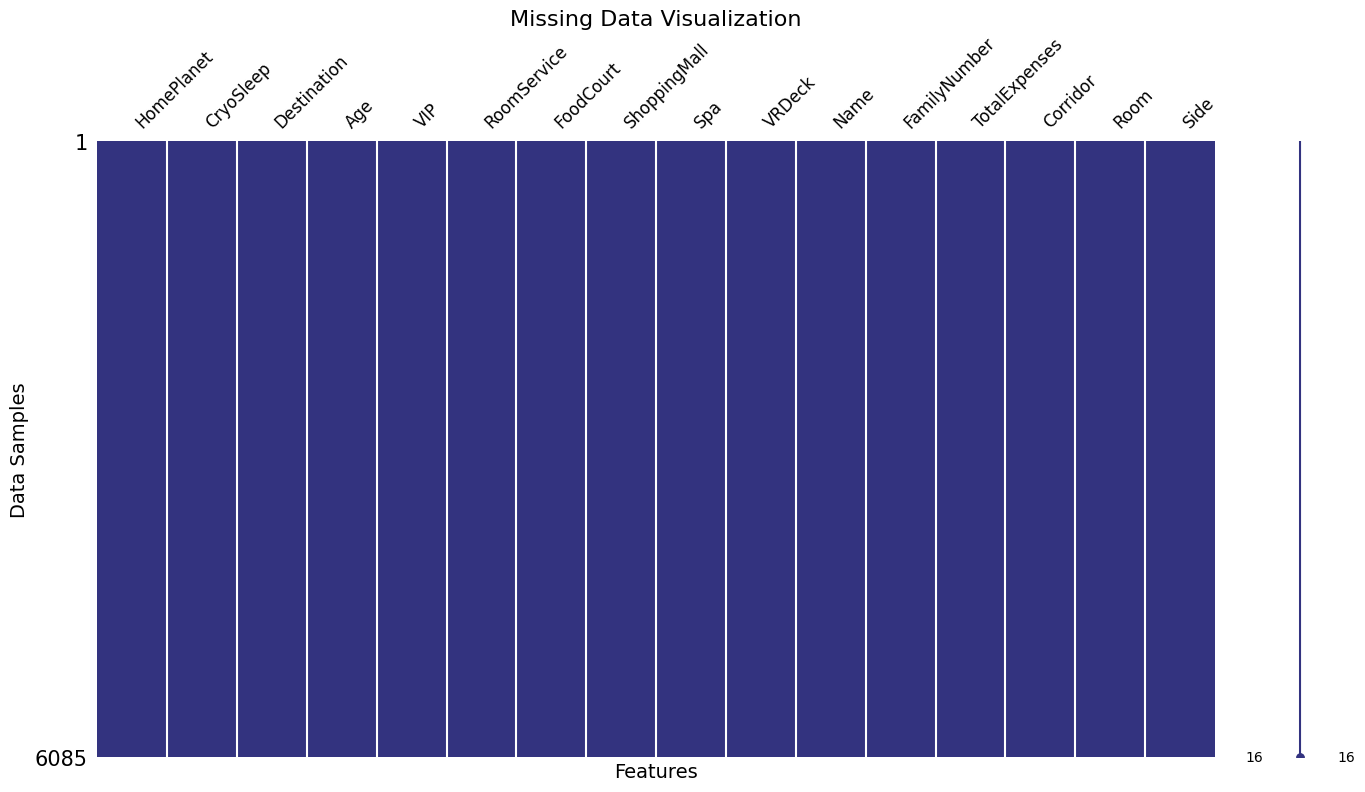

In [72]:
# Visualize missing data after inputations
missingno.matrix(df,figsize=(16,8), fontsize=12, color=(0.20, 0.20, 0.50)) 

# Customize plot labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Data Samples', fontsize=14)
plt.title('Missing Data Visualization', fontsize=16)


plt.show()

#### And voila... only now realizing all this process must be also done with the test data.

In [73]:
# Export the DataFrame to a CSV file
df.to_csv('filled_train.csv', index=False)

# This will create a CSV file named 'filled_train.csv' to f# around in Excel.
